In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
data = np.array(df, dtype=np.float32)

x_data = data[:, 0:-1]  

y_data = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [32]:
from catboost import CatBoostClassifier, Pool
from sklearn import metrics

# Create a CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=6, random_seed=42)

# Convert the training data to a CatBoost Pool
train_pool = Pool(x_train, label=y_train)

# Train the CatBoost model
catboost_model.fit(train_pool)

# Make predictions on the test set
y_train_pred = catboost_model.predict(x_train)
y_test_pred = catboost_model.predict(x_test)

train_acc = metrics.accuracy_score(y_train_pred, y_train)
test_acc = metrics.accuracy_score(y_test_pred, y_test)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

0:	learn: 1.0881207	total: 845us	remaining: 83.7ms
1:	learn: 1.0765080	total: 1.81ms	remaining: 88.8ms
2:	learn: 1.0642599	total: 2.57ms	remaining: 83ms
3:	learn: 1.0528838	total: 3.31ms	remaining: 79.5ms
4:	learn: 1.0412665	total: 3.98ms	remaining: 75.7ms
5:	learn: 1.0324082	total: 4.81ms	remaining: 75.4ms
6:	learn: 1.0215387	total: 5.46ms	remaining: 72.6ms
7:	learn: 1.0102570	total: 6.15ms	remaining: 70.7ms
8:	learn: 0.9983437	total: 6.75ms	remaining: 68.3ms
9:	learn: 0.9882211	total: 7.46ms	remaining: 67.2ms
10:	learn: 0.9791871	total: 8.15ms	remaining: 65.9ms
11:	learn: 0.9697017	total: 8.59ms	remaining: 63ms
12:	learn: 0.9602963	total: 9.27ms	remaining: 62ms
13:	learn: 0.9505619	total: 9.87ms	remaining: 60.6ms
14:	learn: 0.9424910	total: 13ms	remaining: 73.8ms
15:	learn: 0.9340119	total: 13.8ms	remaining: 72.4ms
16:	learn: 0.9233611	total: 14.2ms	remaining: 69.6ms
17:	learn: 0.9136046	total: 14.9ms	remaining: 68ms
18:	learn: 0.9047012	total: 15.6ms	remaining: 66.4ms
19:	learn: 0.8

In [33]:
for p, y in zip(y_test, y_test_pred):
    print("[{}] Test: {} Prediction Y: {}".format(p == int(y), p, int(y))) 

[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print the classification report
print('Classification Report:')
target_names = ['setosa', 'versicolor', 'virginica']
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.86      0.92         7
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.95      0.95        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[16  0  0]
 [ 0  6  1]
 [ 0  0  7]]


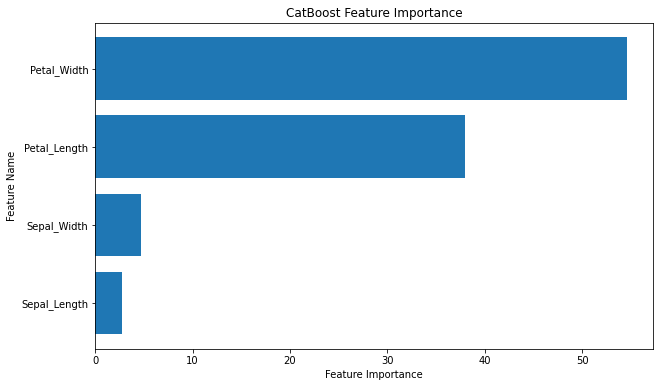

In [35]:
import matplotlib.pyplot as plt

feature_importances = catboost_model.get_feature_importance(Pool(x_train, y_train))
feature_names = df.columns[:-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('CatBoost Feature Importance')
plt.show()

In [36]:
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': feature_importances}
).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
        Feature  Importance
3   Petal_Width   54.589523
2  Petal_Length   37.986481
1   Sepal_Width    4.665646
0  Sepal_Length    2.758350
